Extracted Features (First 5 Samples):
[[4.86389376e-01 1.64424402e-13 9.99999995e-01 1.71824366e-01
  7.34905378e-10 9.99237875e-01 6.58887435e-22 9.99999631e-01
  1.09650268e-15 7.52211224e-10 1.91406880e-16 1.11340066e-19
  1.44597779e-14 9.99624355e-01 1.26827242e-03 2.34233823e-02
  3.81494295e-07 1.16581936e-15 2.20515189e-11 1.00104306e-06
  1.12846818e-03 4.01883650e-16 1.84584776e-01 4.36215606e-10
  9.99999804e-01 2.42175040e-09 6.95812256e-07 1.52993281e-20
  9.99920002e-01 1.39528362e-15 9.99999990e-01 9.07259307e-05
  2.82447685e-08 1.00000000e+00 9.99999889e-01 1.68409790e-15
  9.99614422e-01 5.85585234e-12 2.36425965e-06 8.11869871e-14
  7.83940756e-01 8.19281051e-04 1.00000000e+00 1.99590463e-12
  9.25919525e-01 6.73093236e-17 1.08737457e-16 3.22570318e-13
  6.79116536e-10 9.99937438e-01 5.89121675e-23 8.52017602e-05
  9.27802957e-18 8.24663966e-05 8.20629569e-12 1.19009968e-12
  2.13268565e-11 9.02951645e-19 1.05792090e-05 9.87301940e-01
  1.29906544e-13 8.79965716e-01 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Accuracy: 92.82%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.93      0.93      0.93      1380
           3       0.91      0.90      0.90      1433
           4       0.94      0.89      0.92      1295
           5       0.92      0.91      0.91      1273
           6       0.96      0.97      0.97      1396
           7       0.93      0.91      0.92      1503
           8       0.89      0.91      0.90      1357
           9       0.85      0.90      0.88      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



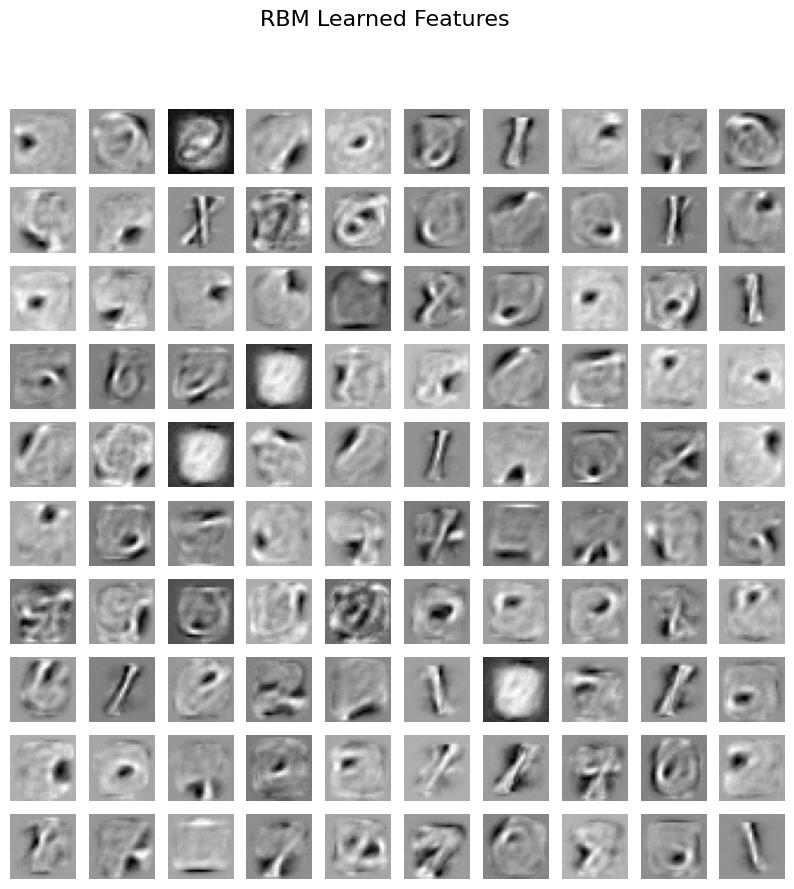

In [1]:
# Implementing Restricted Botzman Machine on MNIST dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbm = BernoulliRBM(n_components=100, learning_rate=0.1, n_iter=10, random_state=42)

rbm.fit(X_train)
X_train_transformed = rbm.transform(X_train)
X_test_transformed = rbm.transform(X_test)

print("Extracted Features (First 5 Samples):")
print(X_train_transformed[:5])

log_reg = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')

log_reg.fit(X_train_transformed, y_train)

accuracy = log_reg.score(X_test_transformed, y_test)
print(f'Classification Accuracy: {accuracy * 100:.2f}%')

y_pred = log_reg.predict(X_test_transformed)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(rbm.components_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("RBM Learned Features", fontsize=16)
plt.show()


Extracted Features from Stacked RBM (First 5 Samples):
[[1.33549382e-06 1.47782362e-06 9.99986430e-01 1.69626416e-01
  1.29401720e-06 1.81013566e-02 1.78144387e-03 8.91086053e-03
  1.33664970e-03 3.27546875e-02 5.27161026e-05 1.96967103e-05
  3.35084894e-06 5.17029578e-06 2.70594871e-06 1.45005390e-06
  1.95860495e-08 1.32990823e-02 2.27213501e-07 2.49806479e-03
  3.01888137e-06 1.81499508e-08 1.02681569e-07 3.87835314e-02
  1.01765762e-08 1.06746570e-08 9.99968504e-01 1.56796079e-05
  6.08264133e-07 1.05453840e-06 6.51617836e-05 2.11407877e-06
  6.31747070e-04 5.95519910e-06 3.72732658e-01 5.61846643e-07
  1.09073871e-06 2.41999541e-04 4.59770675e-06 3.73349609e-04
  2.38724363e-07 7.93691305e-07 4.74127452e-06 3.21844422e-05
  5.30423349e-05 4.36874039e-08 2.70527925e-08 2.79214260e-04
  5.76789383e-01 6.84548642e-06 9.99845786e-01 7.11895475e-06
  7.74325087e-05 1.12288473e-07 6.42299739e-06 1.45179443e-07
  1.91246259e-01 7.00187236e-07 3.03997442e-05 3.72018139e-02
  5.72216637e-0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Accuracy: 95.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.94      0.94      0.94      1433
           4       0.95      0.96      0.95      1295
           5       0.95      0.94      0.95      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.94      0.95      1503
           8       0.93      0.94      0.93      1357
           9       0.91      0.92      0.92      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



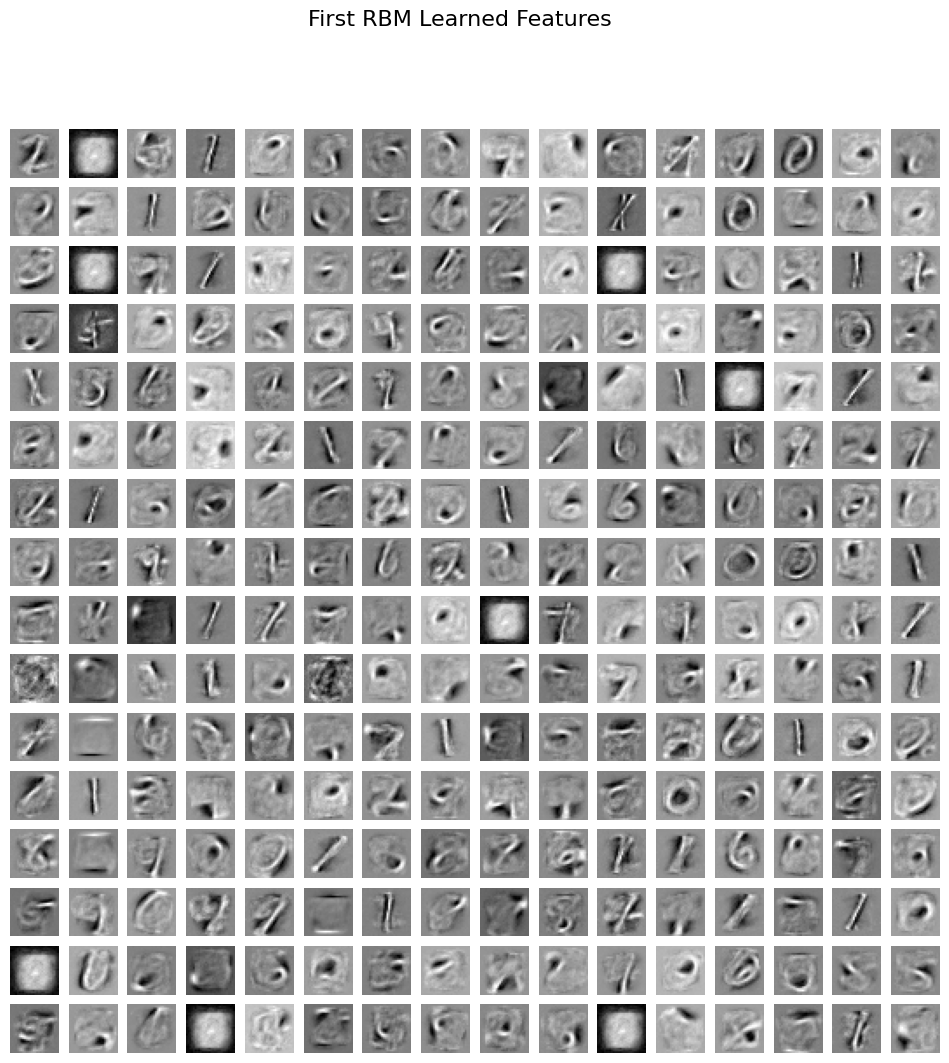

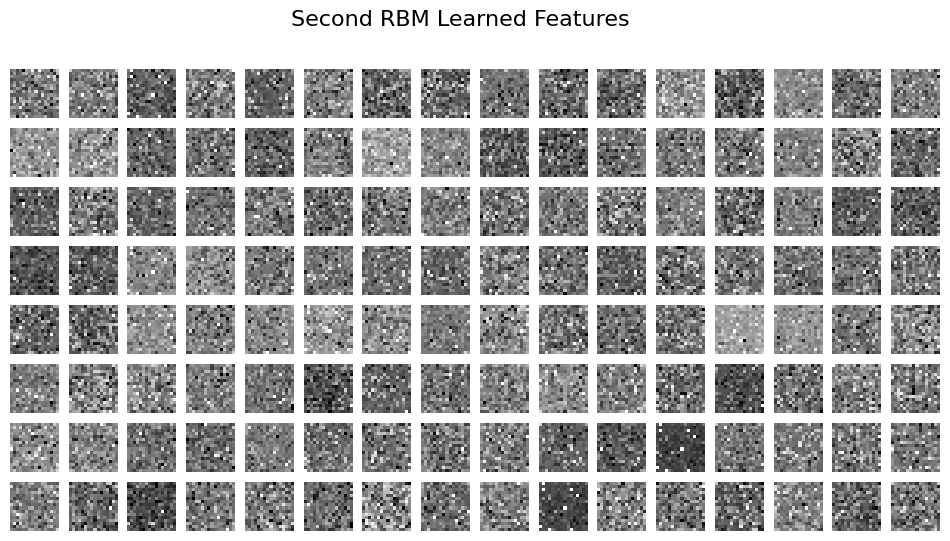

In [2]:
#STACKING USING RBM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rbm1 = BernoulliRBM(n_components=256, learning_rate=0.1, n_iter=10, random_state=42)
rbm2 = BernoulliRBM(n_components=128, learning_rate=0.1, n_iter=10, random_state=42)

rbm1.fit(X_train)
X_train_transformed_1 = rbm1.transform(X_train)
X_test_transformed_1 = rbm1.transform(X_test)

rbm2.fit(X_train_transformed_1)
X_train_transformed_2 = rbm2.transform(X_train_transformed_1)
X_test_transformed_2 = rbm2.transform(X_test_transformed_1)

print("Extracted Features from Stacked RBM (First 5 Samples):")
print(X_train_transformed_2[:5])

log_reg = LogisticRegression(max_iter=2000, solver='lbfgs', multi_class='multinomial')

log_reg.fit(X_train_transformed_2, y_train)

accuracy = log_reg.score(X_test_transformed_2, y_test)
print(f'Classification Accuracy: {accuracy * 100:.2f}%')

y_pred = log_reg.predict(X_test_transformed_2)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(16, 16, figsize=(12, 12))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(rbm1.components_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.suptitle("First RBM Learned Features", fontsize=16)
plt.show()

fig, axes = plt.subplots(8, 16, figsize=(12, 6))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(rbm2.components_[i].reshape(16, 16), cmap='gray')
    ax.axis('off')
plt.suptitle("Second RBM Learned Features", fontsize=16)
plt.show()
